# 10과 [예제] 범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류  
④ 뉴욕 공기 오염도


In [9]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  zn2  
0  396.90   4.98  24.0  1.0  
1  396.90   9.14  21.6  0.0  
2  392.83   4.03  34.7  0.0  
3  394.63   2.94  33.4  0.0  
4  396.90   5.33  36.2  0.0

In [4]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

Ozone  Solar.R  Wind  Temp       Date  Month  Weekday
0     41    190.0   7.4    67 1973-05-01      5        1
1     36    118.0   8.0    72 1973-05-02      5        2
2     12    149.0  12.6    74 1973-05-03      5        3
3     18    313.0  11.5    62 1973-05-04      5        4
4     19      NaN  14.3    56 1973-05-05      5        5

범주별 숫자를 비교할 때 사용되는 방식은 범주별 평균 비교 입니다.  


## 2.평균비교

### 평균

* 범주 ==> 숫자 의 관계를 살펴볼 때 중요한 관점은 ‘평균비교’ 입니다. 

* 평균을 비교할 때는 두 가지를 고려해야 합니다.
    * ① 평균값이 그 집단을 대표할 수 있는가?
    * ② 평균값이 믿을 만 한가?

### 1) 평균값이 그 집단을 대표할 수 있는가?

* 만약에, 생존여부--> 나이 관점에서 데이터를 본다고 합시다.   
(실제로는 나이 --> 생존여부지만요.^^)

In [10]:
s0 = titanic.loc[titanic['Survived']==0, 'Age']
s1 = titanic.loc[titanic['Survived']==1, 'Age']

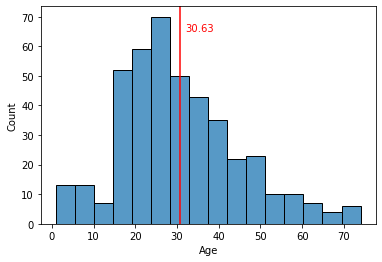

In [11]:
# 사망자의 나이 분포
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color='r')
plt.text(32, 65, round(s0.mean(),2), color = 'r')
plt.show()

In [12]:
# 생존자의 나이 분포
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color='r')
plt.text(32, 42, round(s1.mean(),2), color = 'r')
plt.show()

생존여부에 따라서 나이에 차이가 있다고 보이나요?

* 아래 동영상은 못보셨다면 꼭 보세요~!

> 평균의 함정 : https://www.youtube.com/watch?v=Pp_Pd6GZLOE

### 2) 평균값을 믿을 만 한가?

* 표본 조사를 수행하기로 결정하였을 때,다음 두가지 조사의 오차에 대해서 생각해 봅시다.
    * 조사1 : 전국 성인 10명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 174 cm
    * 조사2 : 전국 성인 1000명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 166 cm

* 어떤 조사 결과가 전국 성인의 평균키와 더 가까울 까요? 어떤 조사 결과가 **오차**가 더 적을 까요?

* 평균이 믿을만 한지는 오차로 평가해야 합니다.
    * 표준편차
    * 표준오차

### 표준편차(SD, Standard Deviation)
* 한 집단을 설명하기 위해서
* 그 집단 안에서 대푯값으로 평균을 구할 때
* 값들이 평균으로부터 얼마나 벗어나 있는지(이탈도, deviation)를 나타내는 값.
    * 예 : 우리 반 수학 성적의 평균이 91, 표준편차는 10

In [9]:
a = np.array([23,54,47,64,29,15])

print(f'평균 : {a.mean()}')
print(f'표준편차 : {a.std()}')

평균 : 38.666666666666664
표준편차 : 17.53726191728787


평균 38.6, 표준편차 17.5는 집단 a를 설명(대표)하는 숫자 입니다.

In [10]:
# 표준편차
titanic.groupby('Survived')['Age'].agg(['mean','std'])

mean        std
Survived                      
0         30.626179  14.172110
1         28.343690  14.950952

### 표준오차(SE, standard error)

* 전체(모집단)를 추정하기 위해서(샘플조사를 합니다.)
* 무작위로 샘플을 뽑아서(랜덤샘플) 평균을 구했는데, 
* 샘플의 평균이 전체(모집단)의 평균과 얼마나 오차가 발생하는지를 나타내는 값.
* 신뢰구간과 관련이 있다.

* 표준오차 공식 : 𝑠/√𝑛
    * 샘플의 표준 편차 : s
    * 데이터 건수 : n

* 몇가지 기호에 대해서
![image.png](attachment:image.png)

In [11]:
# 표준오차

titanic.groupby('Survived')['Age'].agg(['mean','std','sem'])

mean        std       sem
Survived                                
0         30.626179  14.172110  0.688258
1         28.343690  14.950952  0.877950

### 95% 신뢰구간

* 모집단을 하나 준비합니다.

In [12]:
# 임의의 모집단을 하나 만듭시다.
pop2 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]

In [19]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다. (보고 나서 못 본 것으로 합시다.ㅎㅎ)

plt.figure(figsize=(10,6))
sns.histplot(pop2, bins = 100)
plt.axvline(np.mean(pop2), color = 'r')
plt.text(np.mean(pop2)+1, 3600, f'pop mean : {np.mean(pop2).round(2)}', color='r')
plt.show()

* 표본 조사를 합니다. 
    * 100명을 임의로 샘플링 해서 
    * 표본의 평균과, 표준 오차, 신뢰구간을 계산해 봅시다.

In [14]:
# 표본조사를 합니다. 100건
s1 = rd.sample(pop2,100)
s1 = pd.Series(s1)
s1.mean(), s1.std(), s1.sem()

(160.598, 10.610314973570947, 1.0610314973570947)

In [15]:
1.96 * s1.sem()

2.0796217348199053

In [22]:
# 95% 신뢰구간
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

(158.5183782651801, 162.67762173481992)

* 표본평균의 신뢰구간과 모평균을 비교해 봅시다.

In [23]:
# 모평균은?
np.mean(pop2)

160.058401

* 95% 신뢰구간에 대한 실험을 해 봅시다.
    * 샘플조사를 100번 수행합니다.
    * 그때마다 신뢰구간을 계산한 후
    * 그 중 몇번이 모평균을 포함하는지 확인해 봅시다.
    * 95% 신뢰구간이라면, 100번 중 95번은 모평균을 포함해야 합니다.
    * 신뢰구간은 평균을 신뢰할 수 있는지 판단

In [25]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop2,100)

samples = pd.DataFrame(samples)
samples.shape
samples.groupby(by='id')['value'].mean()

id
0     160.260
1     160.322
2     158.140
3     160.812
4     158.157
       ...   
95    160.526
96    160.619
97    162.994
98    161.315
99    160.232
Name: value, Length: 100, dtype: float64

In [27]:
# errorbar 라는 차트 입니다. 
# 신뢰구간, 표준오차 구간을 시각화 하는 방법입니다.

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop2), color = 'r')
plt.show()

# 빨간선은 모평균
# 95% 신뢰구간은 실험을 100번 수행하면 95번은 신뢰구간 안에 모평균이 포함된다는 의미

위 그래프에 대한 해석
* x축은 100번 시도에 대한 순번(인덱스)
* y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과, 신뢰구간 표시

## 3.범주 --> 숫자

titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 시각화 : 평균 비교 barplot, boxplot 

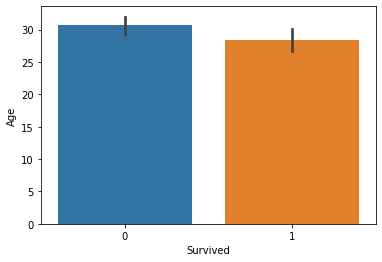

In [6]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="Survived", y="Age", data=titanic)
plt.show()

위 두 범주간에 평균에 차이가 있나요?

 = 없어 보인다

In [7]:
# 박스플롯으로 비교해 봅시다.
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.show()

#### 실습 : 다음의 대립가설에 대해서 차트를 그려봅시다.
* 대립가설: 탑승지(Embarked) 별 나이(Age)에 차이가 있다

* sns.barplot

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

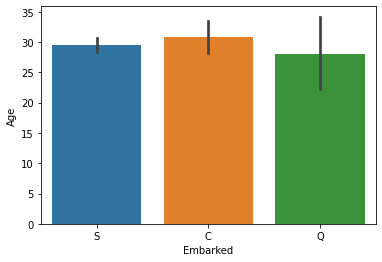

In [8]:
sns.barplot(x='Embarked', y='Age', data=titanic)

* sns.boxplot

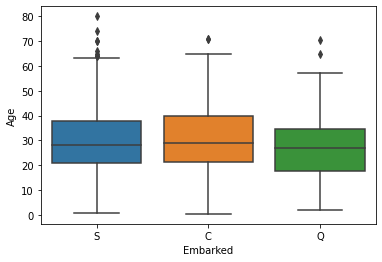

In [9]:
sns.boxplot(x='Embarked', y='Age', data=titanic)
plt.show()

* 차이가 있나요?

### 2)수치화 : t-test(두 범주), anova(세 범주 이상)

#### ①t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test만 다룹니다.

In [10]:
import scipy.stats as spst
import numpy as np
import random as rd

In [17]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

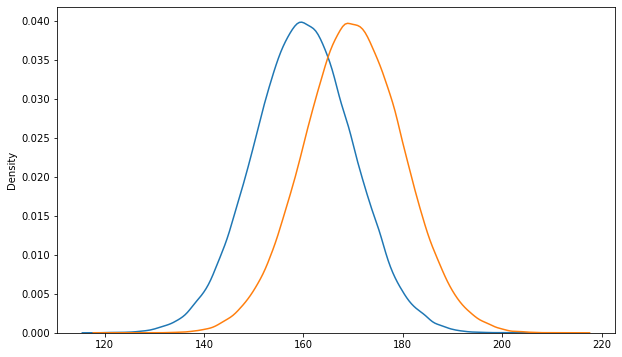

In [18]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다.
plt.figure(figsize=(10,6))
sns.kdeplot(pop1)
sns.kdeplot(pop2)
plt.show()

In [29]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출합시다.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)

In [30]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=1.2213175274625456, pvalue=0.22341804447703748)

p.value의 의미는?

In [39]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [40]:
# t-test
spst.ttest_ind(s1, s2)

Ttest_indResult(statistic=-6.8656422556047225, pvalue=8.332218771852083e-11)

p.value의 의미는?

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


In [81]:
temp = titanic.loc[titanic['Age'].notnull()]

died = temp.loc[temp['Survived']==0, 'Age']       # 사망자의 나이

survived = temp.loc[temp['Survived']==1, 'Age']   # 생존자의 나이

In [47]:
died

0      22.0
4      35.0
6      54.0
7       2.0
12     20.0
       ... 
883    28.0
884    25.0
885    39.0
886    27.0
890    32.0
Name: Age, Length: 424, dtype: float64

In [82]:
spst.ttest_ind(died, survived)
# survived의 평균에 비해서 died의 평균이

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

#### 실습 : t-test 
다음 대립가설에 대해서 검정을 해 봅시다.
* 성별에 따라 운임에 차이가 있을 것이다.

In [54]:
# 범주 쪼개기

male = titanic.loc[titanic['Sex']=='male', 'Fare']
female = titanic.loc[titanic['Sex']=='female', 'Fare']

spst.ttest_ind(male, female)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

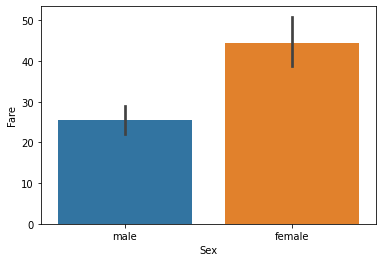

In [55]:
sns.barplot(x='Sex', y='Fare', data = titanic)

#### ②anova

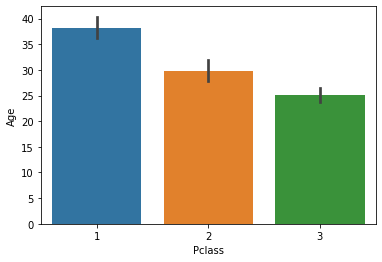

In [56]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.show()

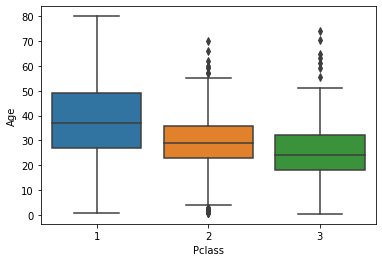

In [57]:
sns.boxplot(x='Pclass', y = 'Age', data = titanic)
plt.show()

In [31]:
temp = titanic.loc[titanic['Age'].notnull()]

P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

# 분산분석 => 전체평균 대비 각각의 그룹의 평균 비교

In [32]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)


#### 실습 ANOVA

다음 대립가설에 대해서 시각화와 가설검정을 해 봅시다.

* 승선지역(Embarked)별로 운임에 차이가 있을 것이다.

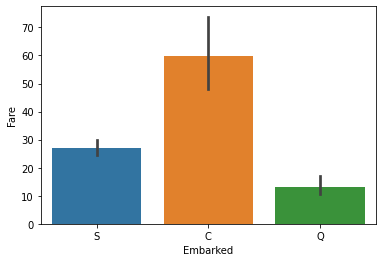

In [76]:
sns.barplot(x='Embarked', y='Fare', data=titanic)
plt.show()

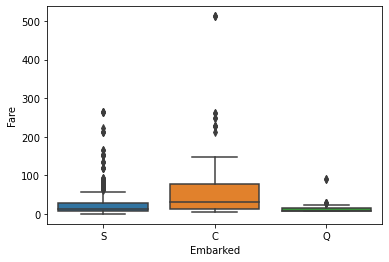

In [63]:
sns.boxplot(x='Embarked', y='Fare', data=titanic)
plt.show()

In [74]:
# temp = titanic.loc[titanic['Age'].notnull()]

e_s = titanic.loc[titanic.Embarked == 'S', 'Fare']
e_c = titanic.loc[titanic.Embarked == 'C', 'Fare']
e_q = titanic.loc[titanic.Embarked == "Q", 'Fare']

In [77]:
spst.f_oneway(e_s, e_c, e_q)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)